# House Price Sales

## 1.0 Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2.0 Data Ingest

In [3]:
data = pd.read_csv('kc_house_data.csv')

## 3.0 Data Description

### 3.1 Checking the dataframe shape

In [4]:
data.shape

(21613, 21)

### 3.2 Checking Data Types

In [5]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

The features we should apply a data conversion type:
    
* **date**: datetime

#### 3.2.1 Date column from 'object' to 'datetime'

In [135]:
data['date'] = pd.to_datetime(data['date'])

### 3.4 Descriptive Statistics

In [7]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.00000,4580301520.86499,2876565571.31206,1000102.00000,2123049194.00000,3904930410.00000,7308900445.00000,9900000190.00000
price,21613.00000,540088.14177,367127.19648,75000.00000,321950.00000,450000.00000,645000.00000,7700000.00000
bedrooms,21613.00000,3.37084,0.93006,0.00000,3.00000,3.00000,4.00000,33.00000
bathrooms,21613.00000,2.11476,0.77016,0.00000,1.75000,2.25000,2.50000,8.00000
sqft_living,21613.00000,2079.89974,918.44090,290.00000,1427.00000,1910.00000,2550.00000,13540.00000
sqft_lot,21613.00000,15106.96757,41420.51152,520.00000,5040.00000,7618.00000,10688.00000,1651359.00000
floors,21613.00000,1.49431,0.53999,1.00000,1.00000,1.50000,2.00000,3.50000
waterfront,21613.00000,0.00754,0.08652,0.00000,0.00000,0.00000,0.00000,1.00000
view,21613.00000,0.23430,0.76632,0.00000,0.00000,0.00000,0.00000,4.00000
condition,21613.00000,3.40943,0.65074,1.00000,3.00000,3.00000,4.00000,5.00000


* **bedrooms**: there are houses with 0 and 33 bedrooms which are unusual. Maybe they're an data entry error and an outlier.
* **bathrooms**: there are houses with 0 bathrooms which are unusual. Maybe it is an data entry error.
* **yr_renovated**: there are houses with yr_renovated=0. This is possibly houses which weren't renovated. 

#### 3.4.1 Remove the outliers and data erros

In [8]:
data = data[(data['bedrooms']>0) & (data['bedrooms']<33) & (data['bathrooms']>0)]

## 4.0 Exploratory Data Analysis

### 4.1 Hyphotesis

1. Newer houses are more expensive than older houses.
2. The more bathrooms, the higher the sale value of a house.
3. The more bedrooms, the higher the sale value of a house.
4. Sale price is affected by the house location.
5. The larger the land, the higher the sale price.
6. The larger the area of the house, the higher the sale price.
7. Houses overlooking the sea come at a higher price.
8. The more floors, the higher the sale price.
9. The better the condition of the house, the higher the sale price.
10. The better the view of the property, the higher the sale price.
11. The better the construction and design, the higher the selling price.
12. Houses that have been renovated have a higher sale price.
13. Houses with greater area on floors above ground level are more expensive.
14. Houses with greater area on floors below ground level are more expensive.

### 4.2 Hyphotesis Validation

#### 4.2.1 Newer houses are more expensive than older houses.

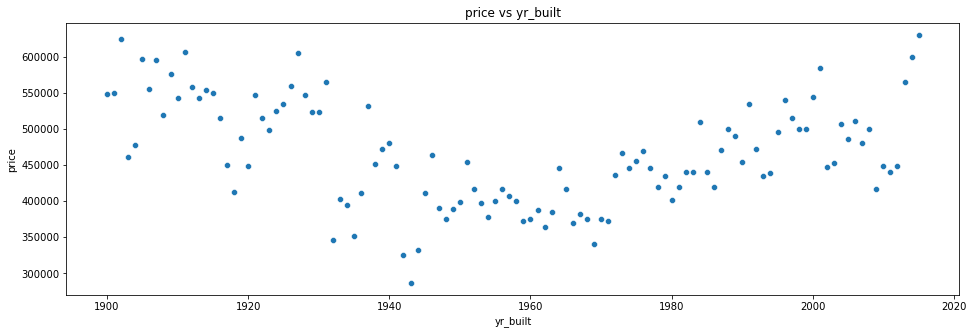

In [44]:
fig, ax = plt.subplots(1,1,figsize=(16,5))

df_aux = data[['yr_built', 'price']].groupby('yr_built').median().reset_index()

sns.scatterplot(data=df_aux, x='yr_built', y='price');
plt.title('price vs yr_built');

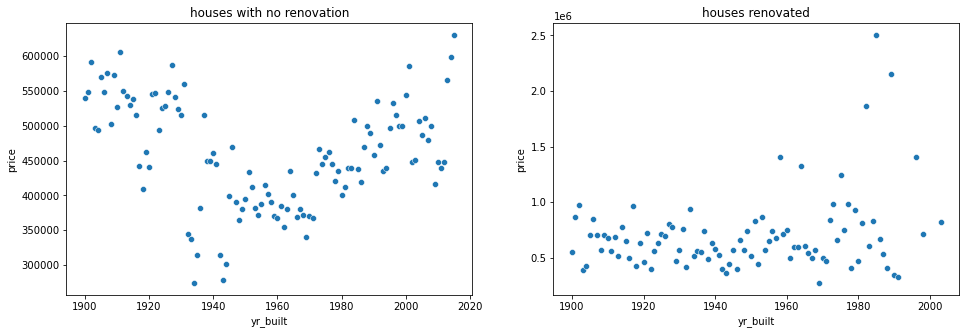

In [45]:
fig, ax = plt.subplots(1,2,figsize=(16,5))

df_aux_0 = data[data['yr_renovated'] == 0][['yr_built', 'price']].groupby('yr_built').median().reset_index()
df_aux_1 = data[data['yr_renovated'] != 0][['yr_built', 'price']].groupby('yr_built').median().reset_index()

sns.scatterplot(x='yr_built', y='price', data=df_aux_0, ax=ax[0]);
sns.scatterplot(x='yr_built', y='price', data=df_aux_1, ax=ax[1]);

ax[0].set_title('houses with no renovation')
ax[1].set_title('houses renovated');

#### 4.2.2 The more bathrooms, the higher the sale value of a house.

**True**

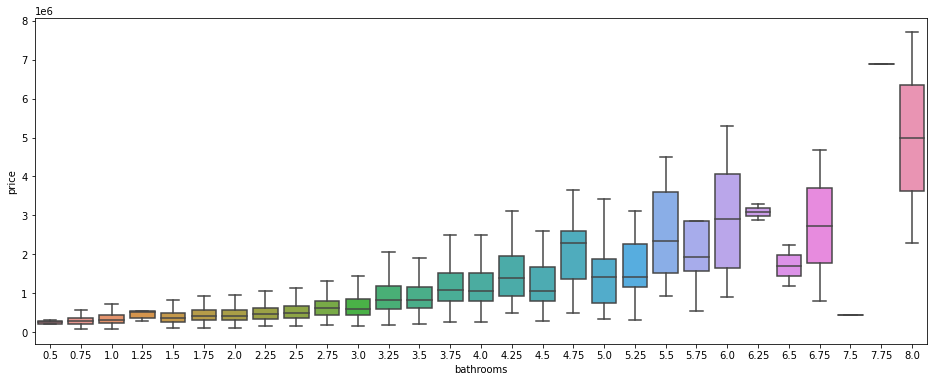

In [62]:
fig, ax = plt.subplots(figsize=(16,6))

sns.boxplot(x='bathrooms', y='price', data=data, showfliers = False);

#### 4.2.3 The more bedrooms, the higher the sale value of a house.

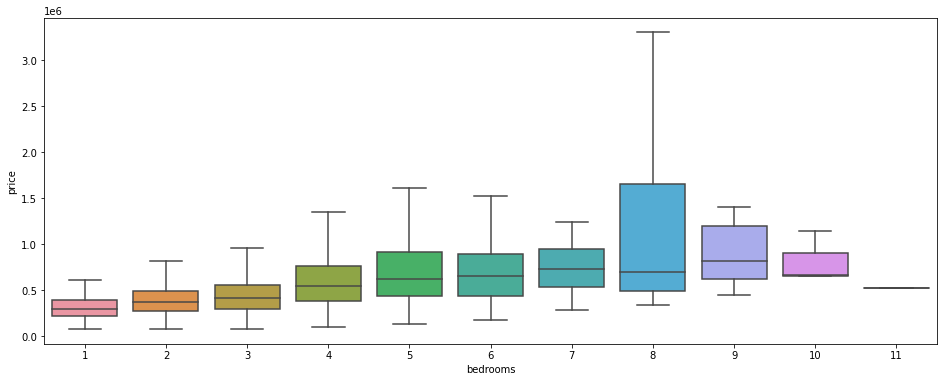

In [63]:
fig, ax = plt.subplots(figsize=(16,6))

sns.boxplot(x='bedrooms', y='price', data=data, showfliers = False);

#### 4.2.4 Sale price is affected by the house location.

In [80]:
import numpy as np
import plotly.express as px

df_aux = data[['zipcode', 'price']].groupby('zipcode').mean().reset_index()

fig = px.treemap(df_aux,
                 path=[px.Constant("Houses - Sales Price per Zip Code"), 'zipcode'],
                 values='price',
                 color='price',
                 color_continuous_scale='RdBu',
                 color_continuous_midpoint=np.median(df_aux['price']))

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

#### 4.2.5 The larger the land, the higher the sale price.

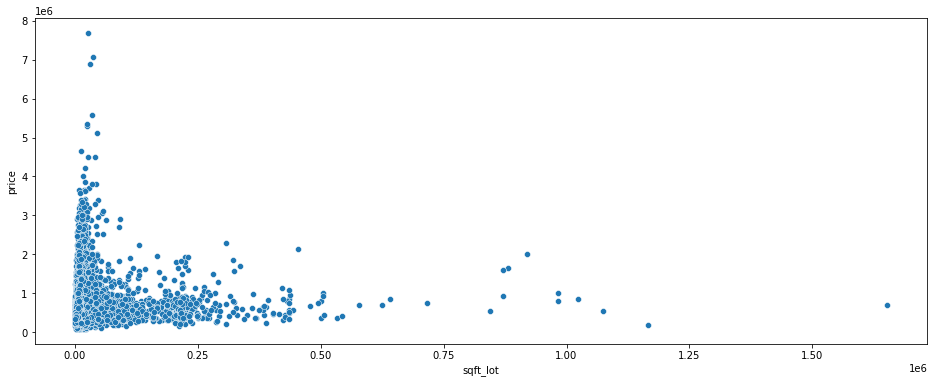

In [82]:
fig, ax = plt.subplots(figsize=(16,6))
sns.scatterplot(x='sqft_lot', y='price', data=data);

#### 4.2.6 The larger the area of the house, the higher the sale price.

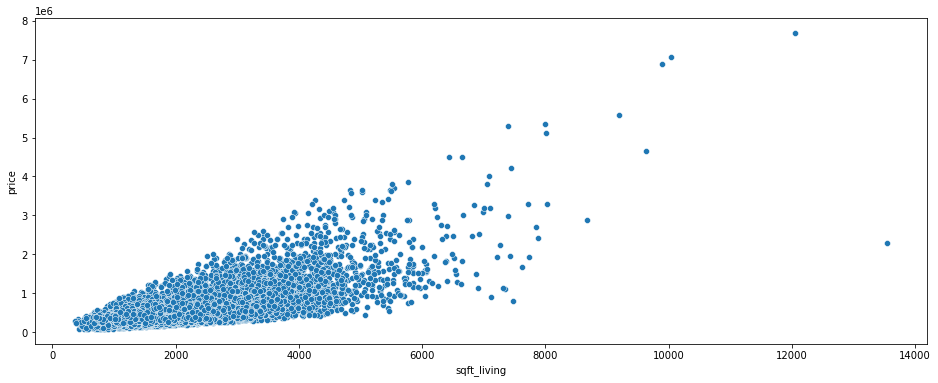

In [83]:
fig, ax = plt.subplots(figsize=(16,6))
sns.scatterplot(x='sqft_living', y='price', data=data);

#### 4.2.7 Houses overlooking the sea come at a higher price.

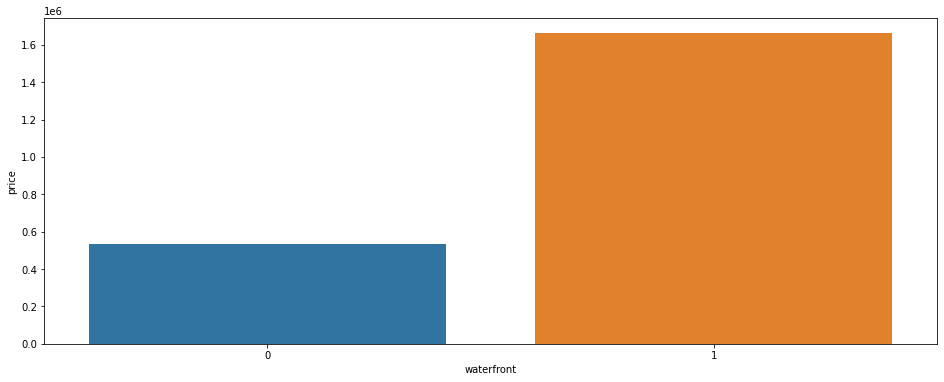

In [97]:
fig, ax = plt.subplots(figsize=(16,6))

#data['is_renovated'] = data['yr_renovated'].apply(lambda yr_renovated: True if yr_renovated != 0 else False)
df_aux = data[['waterfront', 'price']].groupby('waterfront').mean().reset_index()

sns.barplot(x='waterfront', y='price', data=df_aux);

#### 4.2.8 The more floors, the higher the sale price.

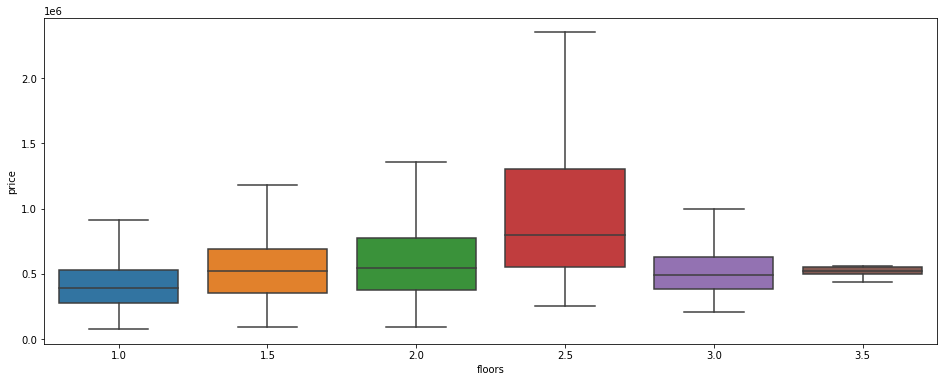

In [84]:
fig, ax = plt.subplots(figsize=(16,6))
sns.boxplot(x='floors', y='price', data=data, showfliers = False);

#### 4.2.9 The better the condition of the house, the higher the sale price.

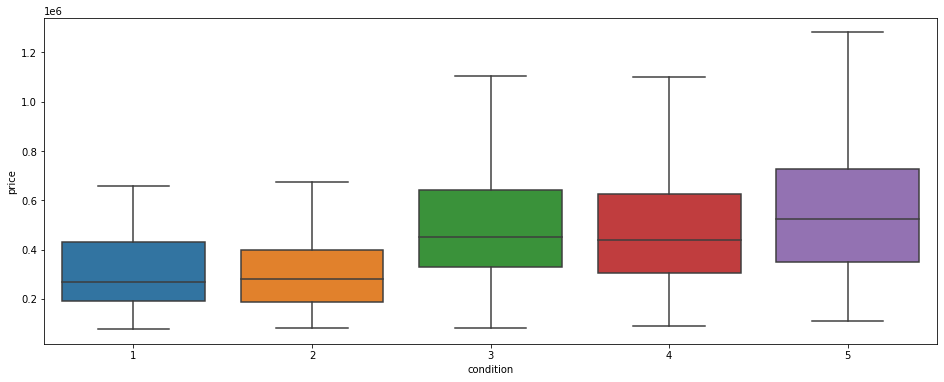

In [85]:
fig, ax = plt.subplots(figsize=(16,6))
sns.boxplot(x='condition', y='price', data=data, showfliers = False);

#### 4.2.10 The better the view of the property, the higher the sale price.

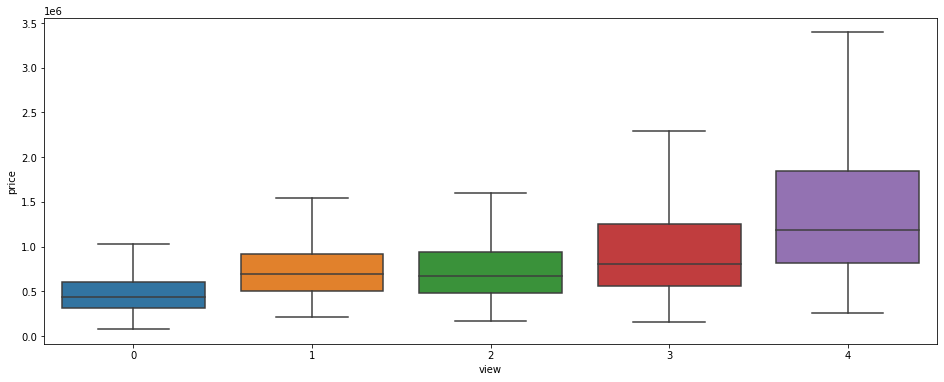

In [86]:
fig, ax = plt.subplots(figsize=(16,6))
sns.boxplot(x='view', y='price', data=data, showfliers = False);

#### 4.2.11 The better the construction and design, the higher the selling price.

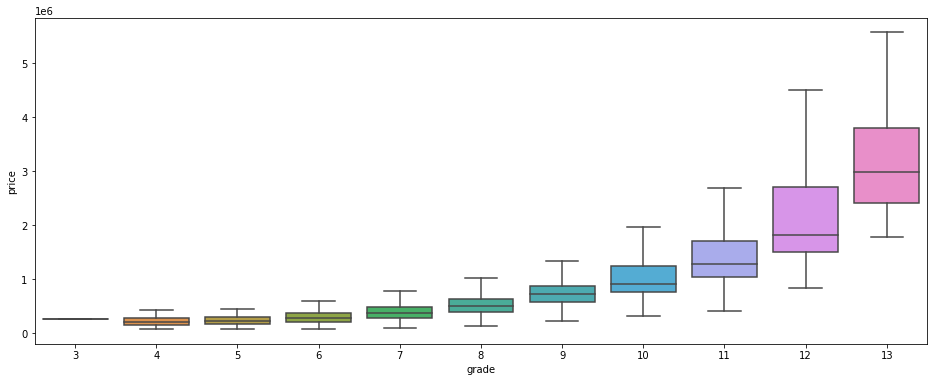

In [87]:
fig, ax = plt.subplots(figsize=(16,6))
sns.boxplot(x='grade', y='price', data=data, showfliers = False);

#### 4.2.12 Houses that have been renovated have a higher sale price.

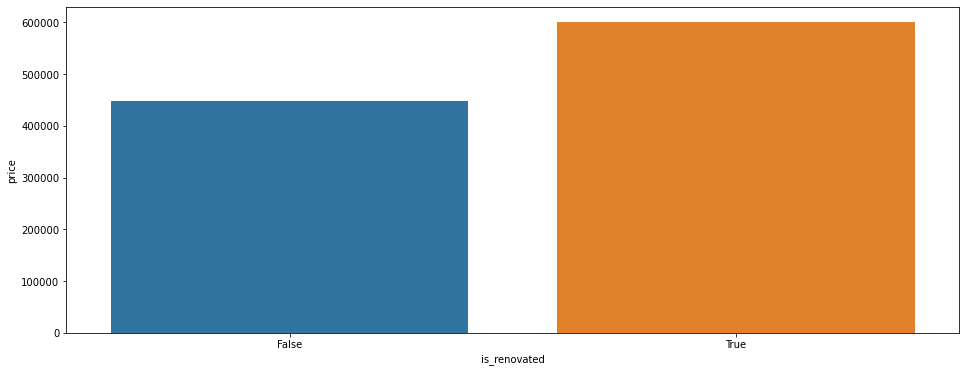

In [96]:
fig, ax = plt.subplots(figsize=(16,6))

data['is_renovated'] = data['yr_renovated'].apply(lambda yr_renovated: True if yr_renovated != 0 else False)
df_aux = data[['is_renovated', 'price']].groupby('is_renovated').mean().reset_index()

sns.barplot(x='is_renovated', y='price', data=df_aux);

#### 4.2.13 Houses with greater area on floors above ground level are more expensive.

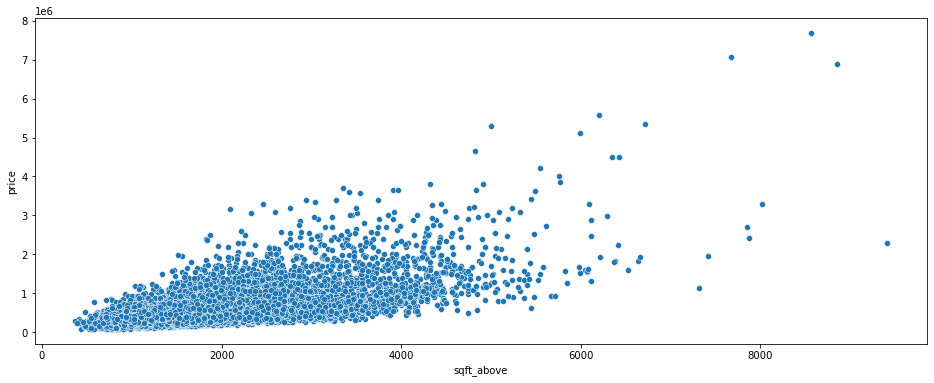

In [88]:
fig, ax = plt.subplots(figsize=(16,6))
sns.scatterplot(x='sqft_above', y='price', data=data);

#### 4.2.14 Houses with greater area on floors below ground level are more expensive.

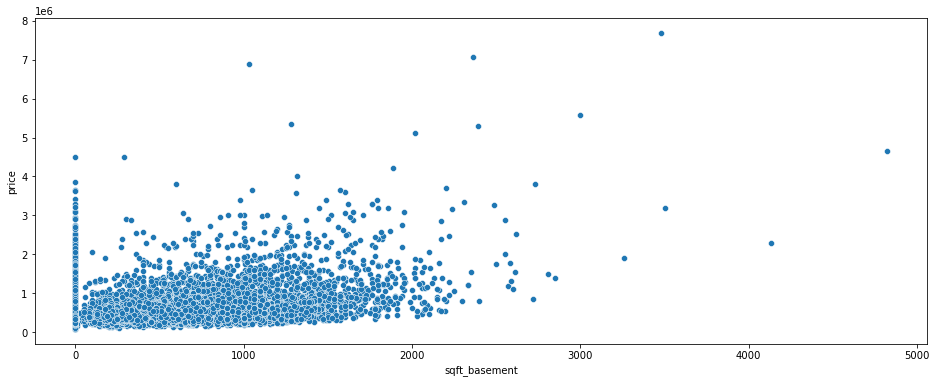

In [89]:
fig, ax = plt.subplots(figsize=(16,6))
sns.scatterplot(x='sqft_basement', y='price', data=data);

#### 4.2.15 People tend to buy less houses in the end and beginning of the year

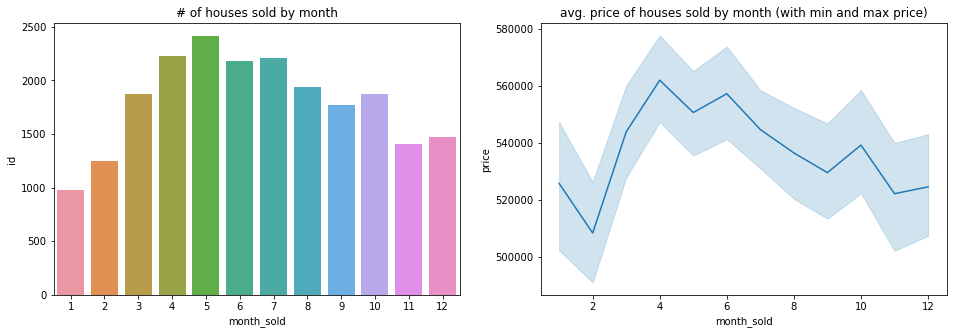

In [134]:
fig, ax = plt.subplots(1,2,figsize=(16,5))

data['month_sold'] = data['date'].dt.month
df_aux_count = data[['month_sold', 'id']].groupby(['month_sold']).count().reset_index()

sns.barplot(data=df_aux_count, x='month_sold', y='id', ax=ax[0])
sns.lineplot(data=data, x='month_sold', y='price', ax=ax[1])

ax[0].set_title('# of houses sold by month')
ax[1].set_title('avg. price of houses sold by month (with min and max price)');

## Dashboard Development

* Writing the dashboard I want to publish on Heroku

In [ ]:
%%writefile dashboard.py
import folium
import geopandas
import numpy as np
import pandas as pd
import streamlit as st
import plotly.express as px
from datetime import datetime
from folium.plugins import MarkerCluster
from streamlit_folium import folium_static

st.set_page_config(layout='wide')

@st.cache(allow_output_mutation=True)
def get_data(path):
    data = pd.read_csv(path)
    return data

@st.cache(allow_output_mutation=True)
def get_geofile( url ):
    geofile = geopandas.read_file( url )
    return geofile

def generate_filtered_dataset(data, col, f_zipcode, f_attributes):
    f_attributes = list(set(f_attributes + ['zipcode', col]))

    if f_attributes != [] and f_zipcode != []:
        df_metrics = data.loc[data['zipcode'].isin(f_zipcode), f_attributes].copy()
    elif f_attributes == [] and f_zipcode != []:
        df_metrics = data.loc[data['zipcode'].isin(f_zipcode), :].copy()
    elif f_attributes != [] and f_zipcode == []:
        df_metrics = data.loc[:, f_attributes].copy()
    else:
        df_metrics = data.copy()
    
    if df_metrics[col].dtype in ['byte', 'int8', 'int32', 'int64']:
        df_metrics[[col, 'zipcode']].groupby('zipcode').count().reset_index()
        
    return df_metrics[[col, 'zipcode']].groupby('zipcode').mean().reset_index()

path = '../data/kc_house_data.csv'
data = get_data(path)

#url = 'https://opendata.arcgis.com/datasets/83fc2e72903343aabff6de8cb445b81c_2.geojson'
url = 'Zip_Codes.geojson'
geofile = get_geofile( url )

data['price_m2'] = data['price']/(data['sqft_lot']/10.764)
data['date'] = pd.to_datetime(data['date'])
data['yr_built'] = data['yr_built'].astype(int)

st.sidebar.image("https://cdn4.iconfinder.com/data/icons/02-real-estate-outline-colors/91/RealEstate-64-512.png", use_column_width=True)

st.sidebar.title('Table filters')

f_attributes = st.sidebar.multiselect('Enter columns', data.columns)
f_zipcode = st.sidebar.multiselect('Enter zipcode(s)', np.sort(data['zipcode'].unique()))

if f_attributes != [] and f_zipcode != []:
    df = data.loc[data['zipcode'].isin(f_zipcode), f_attributes].copy()
elif f_attributes == [] and f_zipcode != []:
    df = data.loc[data['zipcode'].isin(f_zipcode), :].copy()
elif f_attributes != [] and f_zipcode == []:
    df = data.loc[:, f_attributes].copy()
else:
    df = data.copy()

st.title('House sales price - Data analysis')

st.header('Data Sample (showing only a sample of 20 houses)')
st.dataframe(df.head(20))
    
c1, c2 = st.columns((1, 1)) 
    
df1 = generate_filtered_dataset(data, 'id', f_zipcode, f_attributes)
df2 = generate_filtered_dataset(data, 'price', f_zipcode, f_attributes)
df3 = generate_filtered_dataset(data, 'sqft_living', f_zipcode, f_attributes)
df4 = generate_filtered_dataset(data, 'price_m2', f_zipcode, f_attributes)

m1 = pd.merge(df1, df2, on='zipcode', how='inner')
m2 = pd.merge(m1,  df3, on='zipcode', how='inner')
m3 = pd.merge(m2,  df4, on='zipcode', how='inner')

m3.columns = ['ZIP code', 'Total houses', 'price', 'SQRT living','Price/m\u00b2']

c1.header('Average per zipcode')
c1.dataframe(m3.head(8), height=600)

c2.header('Descriptive statistics')
c2.dataframe( df.describe(), height=800 )


st.title('Region overview')

c1, c2 = st.columns(( 1, 1 ))
c1.header( 'Portfolio density' )

#df = data.sample(10)
 
density_map = folium.Map( location=[data['lat'].mean(), 
                          data['long'].mean() ],
                          default_zoom_start=15 ) 

marker_cluster = MarkerCluster().add_to( density_map )
for name, row in df.iterrows():
    folium.Marker( [row['lat'], row['long'] ], 
        popup='Sold R${0} on: {1}. Features: {2} sqft, {3} bedrooms, {4} bathrooms, year built: {5}'.format( row['price'],
                                     row['date'],
                                     row['sqft_living'],
                                     row['bedrooms'],
                                     row['bathrooms'],
                                     row['yr_built'] ) ).add_to( marker_cluster )
with c1:
    folium_static( density_map )

    
c2.header('Price density')

df = data[['price', 'zipcode']].groupby( 'zipcode' ).mean().reset_index()
df.columns = ['ZIP', 'PRICE']


geofile = geofile[geofile['ZIP'].isin( df['ZIP'].tolist() )]

region_price_map = folium.Map( location=[data['lat'].mean(), 
                               data['long'].mean() ],
                               default_zoom_start=15 ) 

region_price_map.choropleth( data = df,
                             geo_data = geofile,
                             columns=['ZIP', 'PRICE'],
                             key_on='feature.properties.ZIP',
                             fill_color='YlOrRd',
                             fill_opacity = 0.7,
                             line_opacity = 0.2,
                             legend_name='AVG PRICE' )
with c2:
    folium_static(region_price_map)
    
st.sidebar.title('Commercial options')
st.title('Commercial attributes')

min_year_built = int(data['yr_built'].min())
max_year_built = int(data['yr_built'].max())+1
mean_year_built = int(data['yr_built'].mean())

st.sidebar.subheader('Select Max Year Built')
f_yr_built = st.sidebar.slider('Year Built', min_year_built, max_year_built, mean_year_built)

st.header('Average Price Per Year Built')
df = data[data['yr_built']<f_yr_built]
df = df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()

df = data[['price', 'yr_built']].groupby( 'yr_built' ).mean().reset_index()
fig = px.line(df, x='yr_built', y='price')

st.plotly_chart(fig, use_container_width=True)

min_date =  datetime.strptime(datetime.strftime(data['date'].min(), '%Y-%m-%d'), '%Y-%m-%d')
max_date =  datetime.strptime(datetime.strftime(data['date'].max(), '%Y-%m-%d'), '%Y-%m-%d')
mode_date = datetime.strptime(datetime.strftime(data['date'].mode()[0], '%Y-%m-%d'), '%Y-%m-%d')

st.sidebar.subheader('Select max date')
print(min_date, type(min_date))
f_date = st.sidebar.slider('Date', min_date, max_date, mode_date)

st.header('Average price per date')
df = data[data['date']<f_date]
df = df[['price', 'date']].groupby('date').mean().reset_index()

fig = px.line(df, x='date', y='price')

st.plotly_chart(fig, use_container_width=True)

st.header('Price Distribution')
st.sidebar.subheader('Select Max Price')

min_price = int(data['price'].min())
max_price = int(data['price'].max())+1
mean_price = int(data['price'].mean())

f_price=st.sidebar.slider('Price', min_price, max_price, mean_price)

df = data[data['price']<f_price]
fig = px.histogram(df, x='price', nbins=50)

st.plotly_chart(fig, use_container_width=True)

st.title('House attributes')
c1, c2 = st.columns((1, 1))

st.sidebar.title('House attributes options')

f_bedrooms=st.sidebar.selectbox('Maximum number of bedrooms', np.sort(data['bedrooms'].unique()), index=4)
df = data[data['bedrooms']<=f_bedrooms]
c1.header('# of houses given a maximum of bedrooms')
fig = px.histogram(df, x='bedrooms', nbins=19)
c1.plotly_chart(fig, use_container_width=True)

f_bathrooms=st.sidebar.selectbox('Maximum number of bathrooms', np.sort(data['bathrooms'].unique()), index=2)
df = data[data['bathrooms']<=f_bathrooms]
c1.header('# of houses given a maximum of bathrooms')
fig = px.histogram(data, x='bathrooms', nbins=19)
c1.plotly_chart(fig, use_container_width=True)

f_floors=st.sidebar.selectbox('Maximum number of floors', np.sort(data['floors'].unique()), index=2)
df = data[data['floors']<=f_floors]
c2.header('# of houses given a maximum of floors')
fig = px.histogram(data, x='floors', nbins=19)
c2.plotly_chart(fig, use_container_width=True)

f_waterfront=st.sidebar.selectbox('Maximum number of waterfront', np.sort(data['waterfront'].unique()), index=0)
df = data[data['waterfront']<=f_waterfront]
c2.header('# of houses given a maximum of waterfront')
fig = px.histogram(data, x='waterfront', nbins=19)
c2.plotly_chart(fig, use_container_width=True)